In [45]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [36]:
#initializing cnn
classifier = Sequential()

#step 1 - convolution and polling
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu',padding='same'))
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(3,3),strides=2))

#adding Dropout
classifier.add(Dropout(0.5))

#ADDING 2ND CONVOLUTION and polling
classifier.add(Convolution2D(64,(3,3),input_shape=(64,64,1),activation='relu',padding='same'))
classifier.add(Convolution2D(64,(3,3),input_shape=(64,64,1),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(3,3),strides=2))

#step3 Flatten
classifier.add(Flatten())

#creating ANN
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=8,activation='softmax'))

In [39]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 31, 31, 64)        36928     
                                                      

In [40]:
#complie the CNN
classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics = ['accuracy'])


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!unrar x /content/drive/MyDrive/data.rar /content/Hand/

Streaming output truncated to the last 5000 lines.
Extracting  /content/Hand/data/train/thumbs/106.png                       68%  OK 
Extracting  /content/Hand/data/train/thumbs/107.png                       68%  OK 
Extracting  /content/Hand/data/train/thumbs/108.png                       68%  OK 
Extracting  /content/Hand/data/train/thumbs/109.png                       68%  OK 
Extracting  /content/Hand/data/train/thumbs/11.png                        68%  OK 
Extracting  /content/Hand/data/train/thumbs/110.png                       68%  OK 
Extracting  /content/Hand/data/train/thumbs/111.png                       68%  OK 
Extracting  /content/Hand/data/train/thumbs/112.png                       68%  OK 
Extracting  /content/Hand/data/train/thumbs/113.png                       68%  OK 
Extracting  /content/Hand/data/train/thumbs/114.png                       68%  OK 
Extracting  /content/Hand/dat

In [18]:
#radom scaling are applied to the images before training the model
#image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
samplewise_center=True,
vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/Hand/data/train/',
        target_size=(64,64),#it should same as the input shape in convolaion
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '/content/Hand/data/validation',
        target_size=(64,64),#it should same as the input shape in convolaion
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical')

Found 7999 images belonging to 8 classes.
Found 3999 images belonging to 8 classes.


#Visualizing Training data

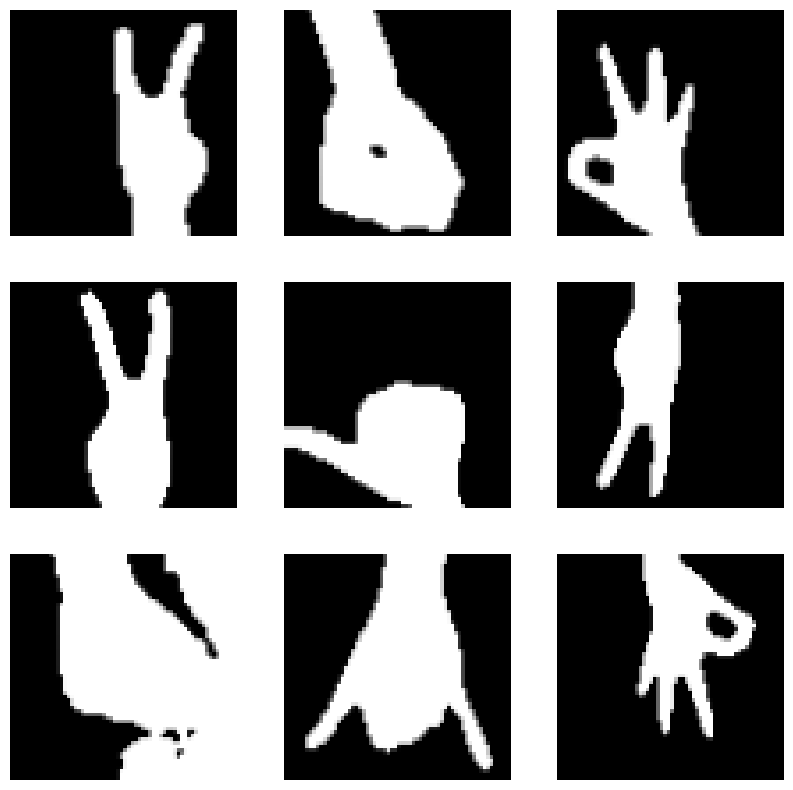

In [49]:
# Load a few sample images from the training dataset
sample_data, _ = training_set.next()

# Display the sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_data[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
plt.show()

#Training the CNN model

In [47]:
epoch=20

In [41]:
history=classifier.fit_generator(training_set,epochs=20,validation_data=test_set)

<ipython-input-41-0d42065a641f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(training_set,epochs=20,validation_data=test_set)


Epoch 1/20
250/250 [==============================] - 17s 59ms/step - loss: 0.7671 - accuracy: 0.7215 - val_loss: 0.2662 - val_accuracy: 0.9110
Epoch 2/20
250/250 [==============================] - 15s 58ms/step - loss: 0.1245 - accuracy: 0.9599 - val_loss: 0.1849 - val_accuracy: 0.9500
Epoch 3/20
250/250 [==============================] - 15s 58ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.2765 - val_accuracy: 0.9377
Epoch 4/20
250/250 [==============================] - 18s 70ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.2783 - val_accuracy: 0.9450
Epoch 5/20
250/250 [==============================] - 17s 69ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.1339 - val_accuracy: 0.9682
Epoch 6/20
250/250 [==============================] - 15s 60ms/step - loss: 0.0244 - accuracy: 0.9930 - val_loss: 0.0868 - val_accuracy: 0.9765
Epoch 7/20
250/250 [==============================] - 15s 59ms/step - loss: 0.0218 - accuracy: 0.9940 - val_loss: 0.1581 - val_accuracy:

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Evaluate The CNN Model

Loss and Accuracy

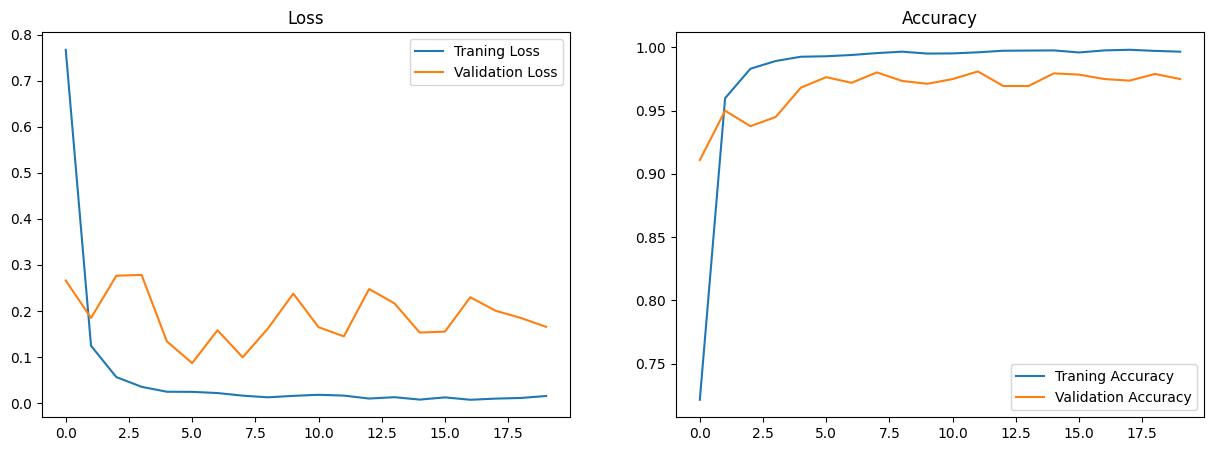

In [48]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss,label="Traning Loss")
plt.plot(range(epoch),val_loss,label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epoch),accuracy,label="Traning Accuracy")
plt.plot(range(epoch),val_accuracy,label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

In [50]:
#saving the model using it along with opencv
from keras.models import load_model
classifier.save('hand_gestures.h5') #name of the model